In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from explore import group_tenure, group_monthly_charges

In [2]:
# import data into dataframe
train = pd.read_csv('train.csv')

In [3]:
train

,Unnamed: 0,customer_id,churn,tenure,tenure_months,tenure_nml,monthly_charges,monthly_charges_nml,total_charges,total_charges_nml,...,device_protection_enc,tech_support_enc,streaming_tv_enc,streaming_movies_enc,paperless_billing_enc,pay_elec_check,pay_mail,pay_bank,pay_cc,pay_auto
0,5691,5762-TJXGK,No,52,4.33,0.559592,58.75,-0.270565,3038.55,0.485586,...,1,0,1,1,1,0,0,1,0,1
1,6232,6242-FEGFD,No,66,5.50,1.073988,96.60,0.971152,6424.25,1.453931,...,1,1,0,0,0,0,1,0,0,0
2,5807,7359-SSBJK,Yes,64,5.33,0.967422,70.20,-0.036837,4481.00,0.819781,...,0,1,1,0,1,0,0,0,1,1
3,2746,7024-OHCCK,Yes,2,0.17,-1.220640,93.85,0.787436,170.85,-1.011789,...,0,0,1,1,1,1,0,0,0,0
4,3143,9054-FOWNV,No,22,1.83,-0.216904,88.75,0.601211,1885.15,0.191240,...,1,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,4056,3229-USWAR,No,34,2.83,0.114185,79.95,0.270877,2727.30,0.403571,...,1,1,1,1,1,0,0,1,0,1
1405,1026,8260-NGFNY,Yes,1,0.08,-1.639976,25.20,-0.790280,25.20,-1.827977,...,0,0,0,0,0,0,1,0,0,0
1406,2386,5334-JLAXU,No,60,5.00,0.799083,94.10,0.799083,5475.90,1.070816,...,0,0,0,1,1,0,0,0,1,1
1407,1776,2674-MIAHT,No,4,0.33,-0.967422,80.30,0.289947,324.20,-0.775553,...,0,0,0,0,1,0,1,0,0,0


# Data Exploration
- Goal: Answer key questions
    1. If a group is identified by tenure, is there a cohort or cohorts who have a higher rate of churn than other cohorts? 
        - (Plot the rate of churn on a line chart where x is the tenure and y is the rate of churn (customers churned/total customers))
    2. Are there features that indicate a higher propensity to churn? 
        - like type of internet service, type of phone service, online security and backup, senior citizens, paying more than x% of customers with the same services, etc.?
    3. Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service(s)?
    4. If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?
    5. Controlling for services (phone_id, internet_service_type_id, online_security_backup, device_protection, tech_support, and contract_type_id), is the mean monthly_charges of those who have churned significantly different from that of those who have not churned? 
        - (Use a t-test to answer this.)
    6. How much of monthly_charges can be explained by internet_service_type? 
        - (hint: correlation test). 
    7. How much of monthly_charges can be explained by internet_service_type + phone service type (0, 1, or multiple lines). 


### Hypotheses:
1. Are there clear groupings in tenure where a customer is more likely to churn? 
    - $H_0$: There are no cohorts who have a higher rate of churn than other cohorts
    - $H_a$: There is a cohort with a higher rate of churn than others

2. Are there features that indicate a higher propensity to churn? 
    - $H_0$: There are no features who have a higher rate of churn than other features
    - $H_a$: Senior citizens have a higher rate of churn 
    - $H_a$: Month-to-month contracts have a higher rate of churn 
    - $H_a$: Two-year contracts have a higher rate of churn
    - $H_a$: People that pay by electronic check have a higher rate of churn 
    - $H_a$: 

3. Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point?
    - $H_0$: There is no price threshold for specific services where the likelihood of churn increases
    - $H_a$: Higher price phone services are more likeley to churn

4. If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?
    - $H_0$: Month-to-month customers and 1-year contract customers are equally likely to churn after the 12th month
    - $H_a$: Month-to-month customers are more likely to churn after the 12th month than 1-year contract customers
    - $H_a$: 1-year contract customers are more likely to churn after the 12th month than month-to-month customers

In [4]:
train.shape

(1409, 31)

#### Group tenure into catagories

In [5]:
train = group_monthly_charges(train)
train.monthly_charges_group.value_counts()

eighty_one_to_ninety                    199
twenty_one_to_thirty                    192
seventy_one_to_eighty                   186
ninety_one_to_one_hundred               163
one_hundred_to_one_hundred_ten          148
one_to_twenty                           142
fifty_one_to_sixty                      117
sixty_one_to_seventy                    102
forty_one_to_fifty                       90
one_hundred_eleven_to_hundred_twenty     39
thirty_one_to_forty                      31
Name: monthly_charges_group, dtype: int64

In [6]:
train = group_tenure(train)
train.monthly_charges_group.value_counts()

eighty_one_to_ninety                    199
twenty_one_to_thirty                    192
seventy_one_to_eighty                   186
ninety_one_to_one_hundred               163
one_hundred_to_one_hundred_ten          148
one_to_twenty                           142
fifty_one_to_sixty                      117
sixty_one_to_seventy                    102
forty_one_to_fifty                       90
one_hundred_eleven_to_hundred_twenty     39
thirty_one_to_forty                      31
Name: monthly_charges_group, dtype: int64

### Plot tenure and monthly_charges 
- for each level of internet service
- hue by churn

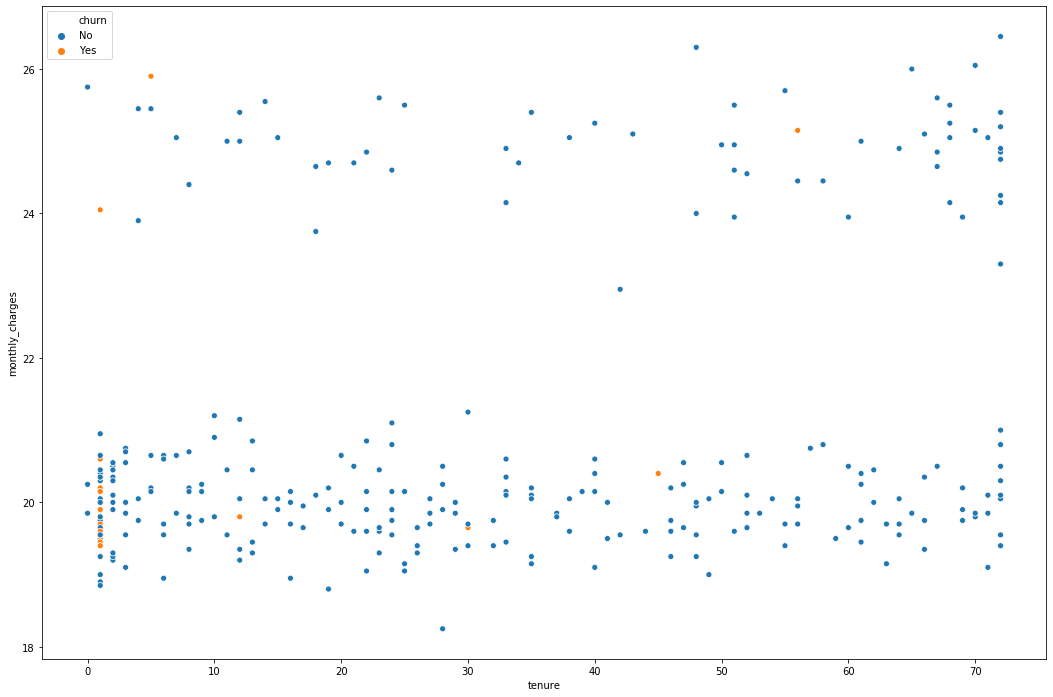

In [7]:
# internet_services == 0 
plt.figure(figsize=(18,12))
sns.scatterplot(x='tenure', y='monthly_charges', data=train[train.internet_services == 0], hue='churn')

- phone service only: 
    - while there are a few, there have a low churn rate

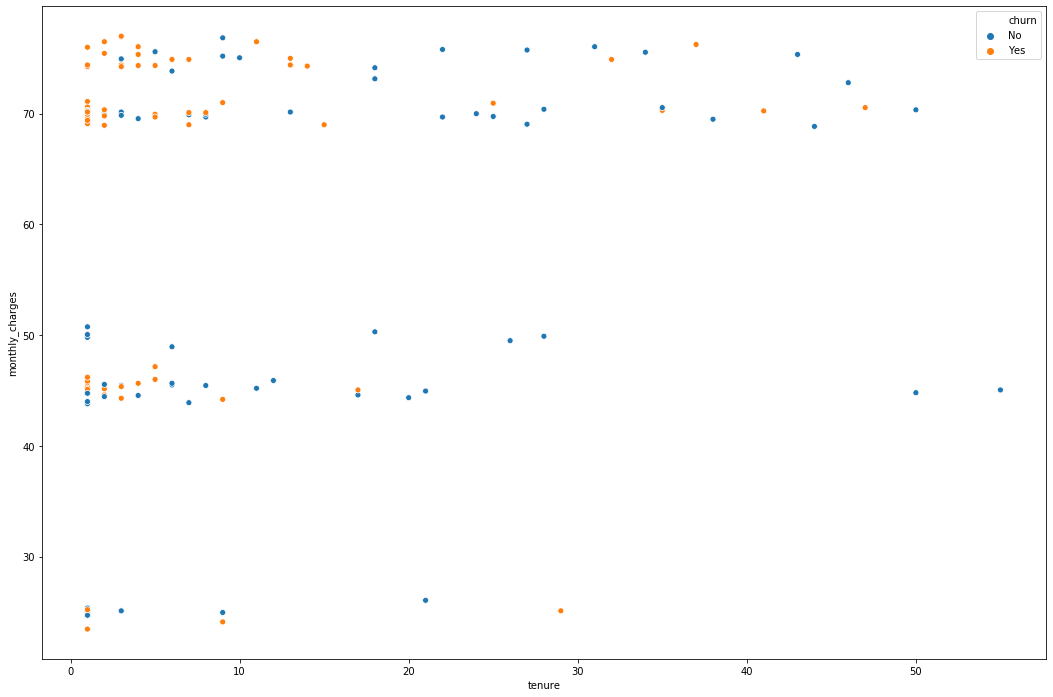

In [8]:
# internet_services == 1
plt.figure(figsize=(18,12))
sns.scatterplot(x='tenure', y='monthly_charges', data=train[train.internet_services == 1], hue='churn')

- one internet service: 
    - the churn rate has increased as monthly charges increase

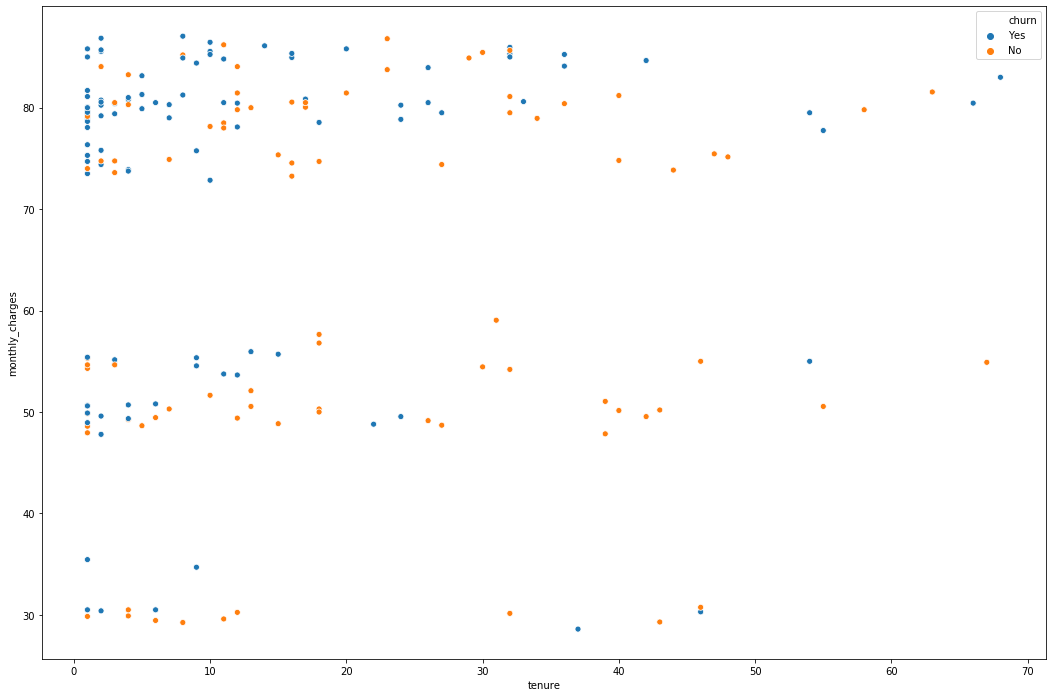

In [9]:
# internet_services == 2
plt.figure(figsize=(18,12))
sns.scatterplot(x='tenure', y='monthly_charges', data=train[train.internet_services == 2], hue='churn')

- two internet services:
    - the churn rate has not changed from one service, 
    - but churn numbers increase with account increase

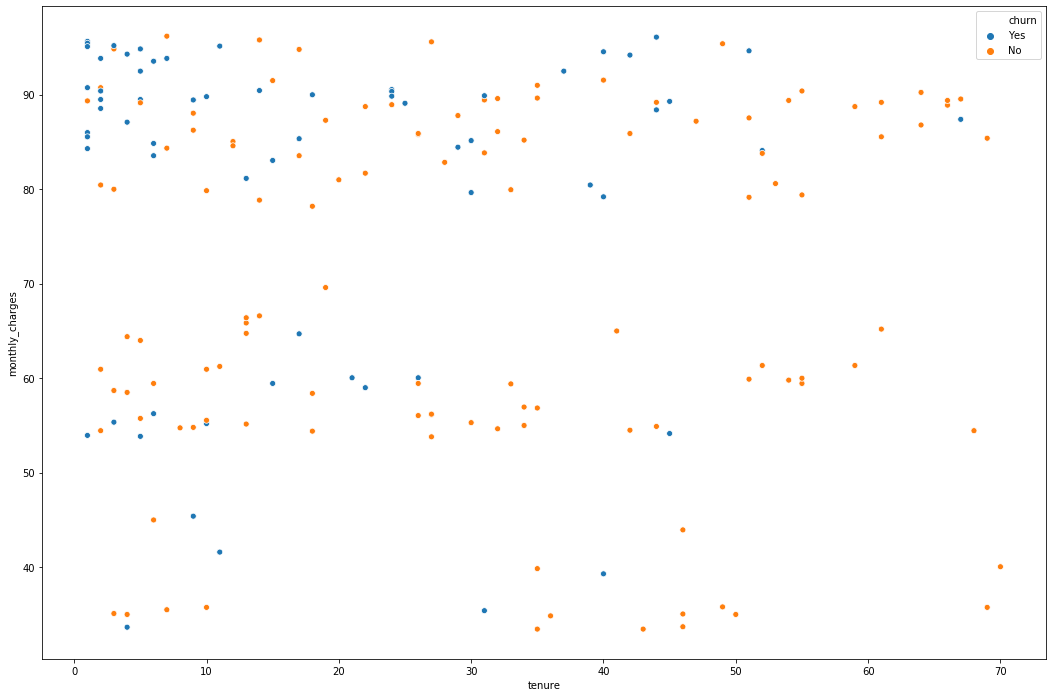

In [10]:
# internet_service == 3
plt.figure(figsize=(18,12))
sns.scatterplot(x='tenure', y='monthly_charges', data=train[train.internet_services == 3], hue='churn')

- three internet services: 
    - churn rate now exceeds retain rate at all levels

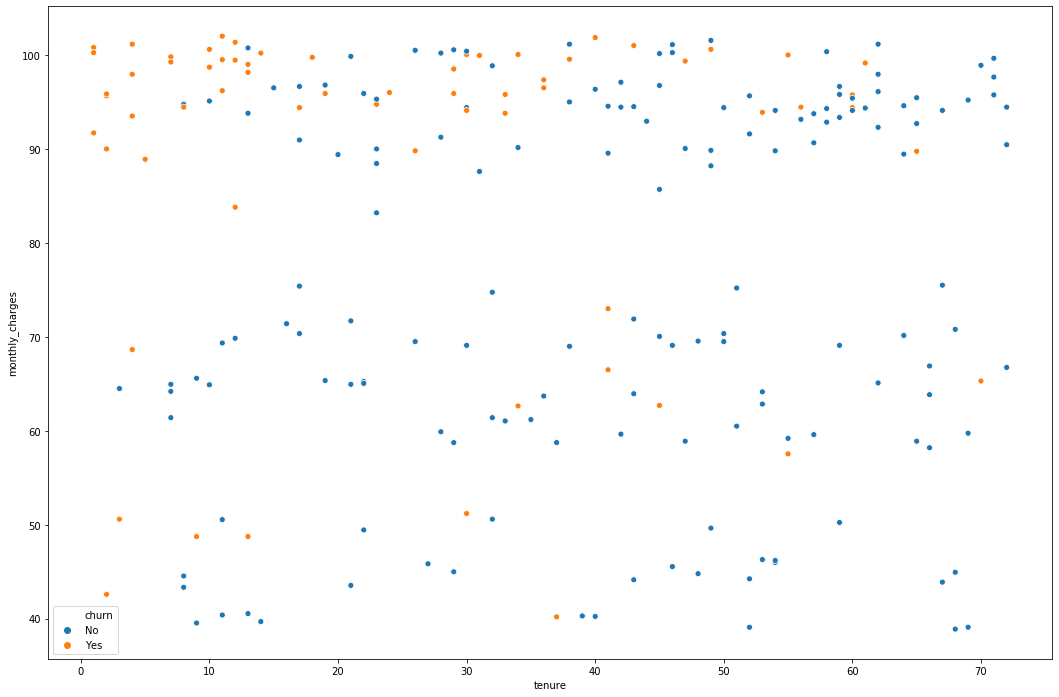

In [11]:
# internet_service == 4
plt.figure(figsize=(18,12))
sns.scatterplot(x='tenure', y='monthly_charges', data=train[train.internet_services == 4], hue='churn')

- four internet services: 
    - churn rate greatly reduced. 
    - high monthly_charges still has a considerable churn rate
    - but mid and low monthly_charges churn rate has almost ceased

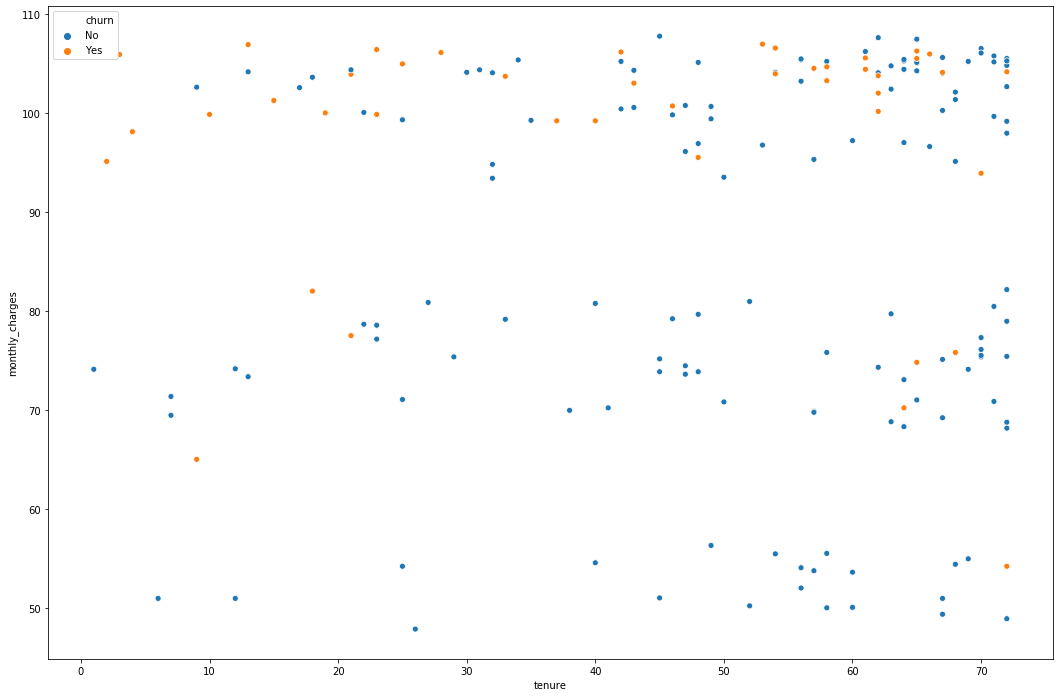

In [12]:
# internet_service == 5
plt.figure(figsize=(18,12))
sns.scatterplot(x='tenure', y='monthly_charges', data=train[train.internet_services == 5], hue='churn')

- five internet services: 
    - churn rate greatly reduced for lower tenure. 
    - high tenure has a considerable churn rate

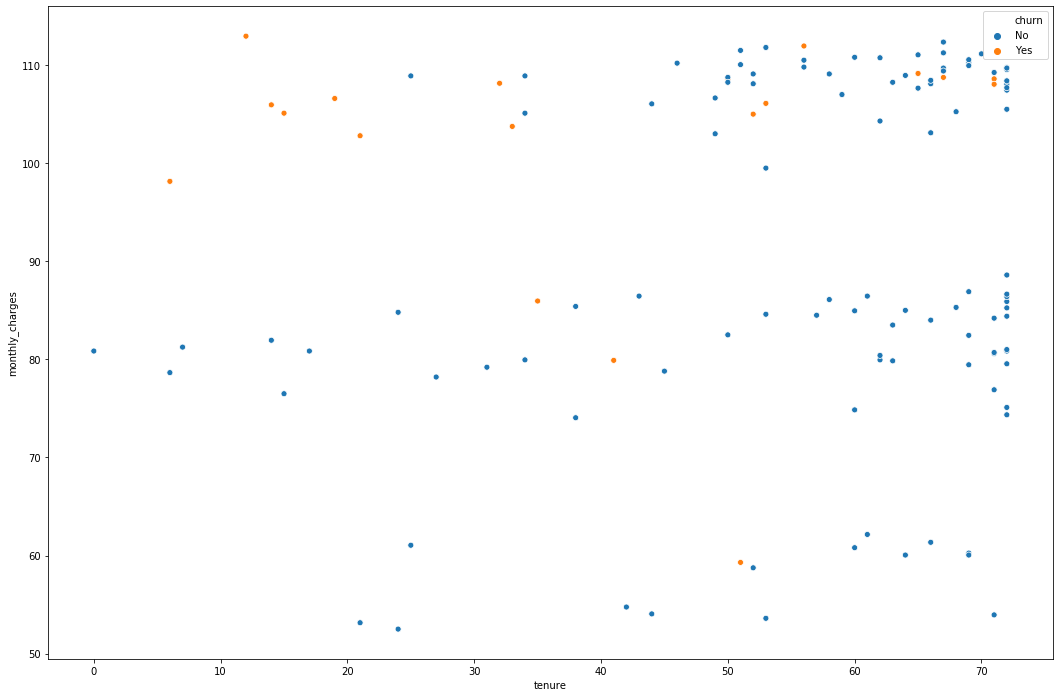

In [13]:
# internet_service == 6
plt.figure(figsize=(18,12))
sns.scatterplot(x='tenure', y='monthly_charges', data=train[train.internet_services == 6], hue='churn')

- six internet services: 
    - almost all customers at this level has churned

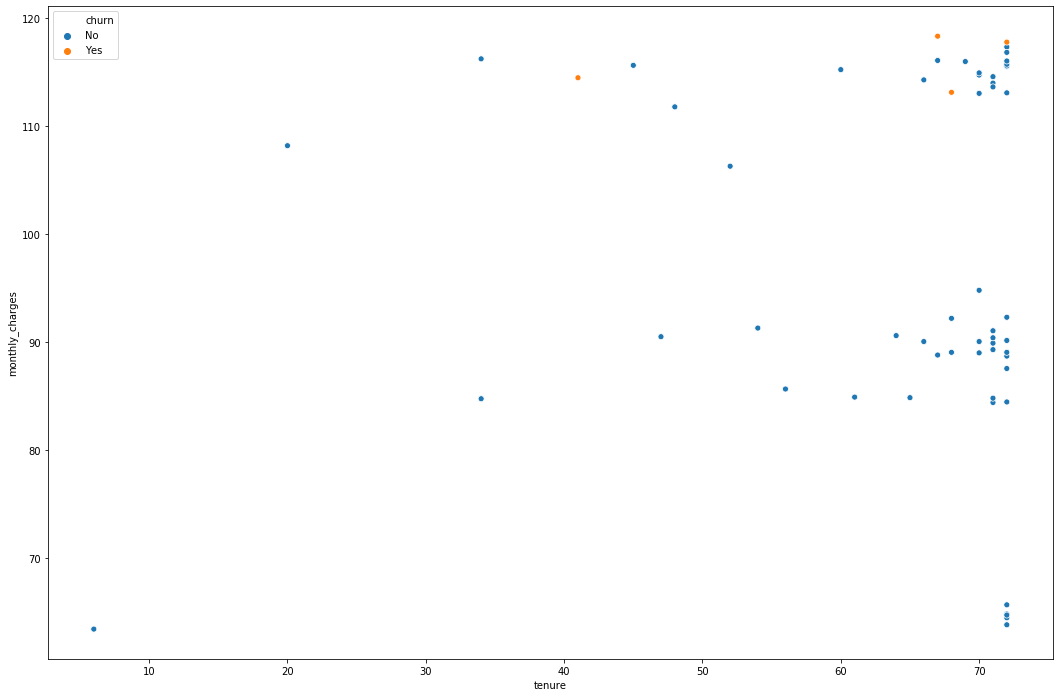

In [14]:
# internet_service == 7
plt.figure(figsize=(18,12))
sns.scatterplot(x='tenure', y='monthly_charges', data=train[train.internet_services == 7], hue='churn')

- seven internet services: 
    - churn rate is almost non-exsistant at this level

In [15]:
train[train.internet_services == 4]

,Unnamed: 0,customer_id,churn,tenure,tenure_months,tenure_nml,monthly_charges,monthly_charges_nml,total_charges,total_charges_nml,...,streaming_tv_enc,streaming_movies_enc,paperless_billing_enc,pay_elec_check,pay_mail,pay_bank,pay_cc,pay_auto,monthly_charges_group,tenure_group
15,4665,4083-BFNYK,No,38,3.17,0.191052,95.00,0.864399,3591.25,0.629893,...,0,1,0,0,0,0,1,1,ninety_one_to_one_hundred,three_&_a_half_years
17,4894,8268-YDIXR,No,56,4.67,0.698526,93.15,0.761331,5253.95,1.008648,...,0,0,1,1,0,0,0,0,ninety_one_to_one_hundred,five_years
29,3219,9445-SZLCH,Yes,36,3.00,0.157434,97.35,0.996892,3457.90,0.587436,...,1,0,1,0,0,1,0,1,ninety_one_to_one_hundred,three_years
44,4094,3950-VPYJB,No,57,4.75,0.714776,59.60,-0.250528,3509.40,0.604289,...,0,0,0,0,1,0,0,0,fifty_one_to_sixty,five_years
47,2806,7315-WYOAW,No,13,1.08,-0.472789,100.75,1.180765,1313.25,-0.065389,...,1,1,0,1,0,0,0,0,one_hundred_to_one_hundred_ten,one_&_a_half_years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,3893,0308-IVGOK,No,11,0.92,-0.574460,40.40,-0.636028,422.60,-0.662275,...,0,0,1,0,0,0,1,1,forty_one_to_fifty,one_year
1396,4554,2014-MKGMH,No,46,3.83,0.375793,101.10,1.203793,4674.40,0.866129,...,1,1,1,1,0,0,0,0,one_hundred_to_one_hundred_ten,four_years
1398,1852,2979-SXESE,Yes,17,1.42,-0.348756,94.40,0.823762,1607.20,0.084445,...,1,0,0,1,0,0,0,0,ninety_one_to_one_hundred,one_&_a_half_years
1399,1918,3217-FZDMN,Yes,8,0.67,-0.714776,94.45,0.827924,742.95,-0.387941,...,1,1,1,0,0,0,1,1,ninety_one_to_one_hundred,one_year


- they asked about tenure cohorts and ppl with different contracts
- monthly charges groups could be created

pd.crosstab(train.tenure_group, train.contract_type)

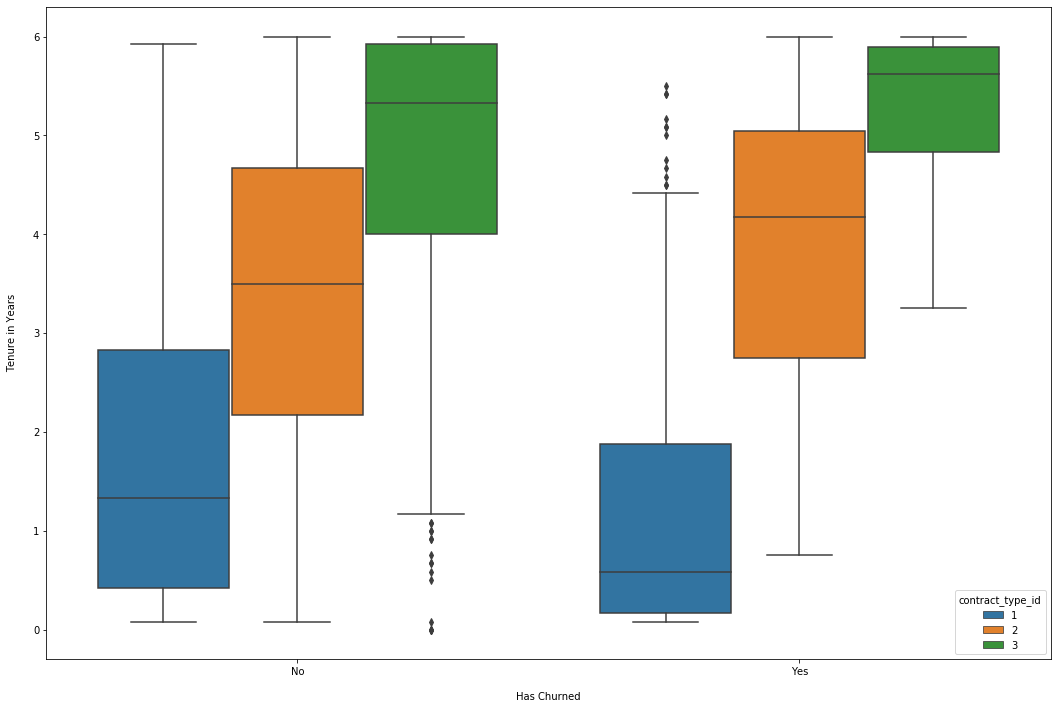

In [16]:
# internet_service == 7
plt.figure(figsize=(18, 12))
sns.boxplot(y='tenure_months', x='churn', data=train, hue='contract_type_id')
plt.ylabel('Tenure in Years\n')
plt.xlabel('\nHas Churned')
plt.show()

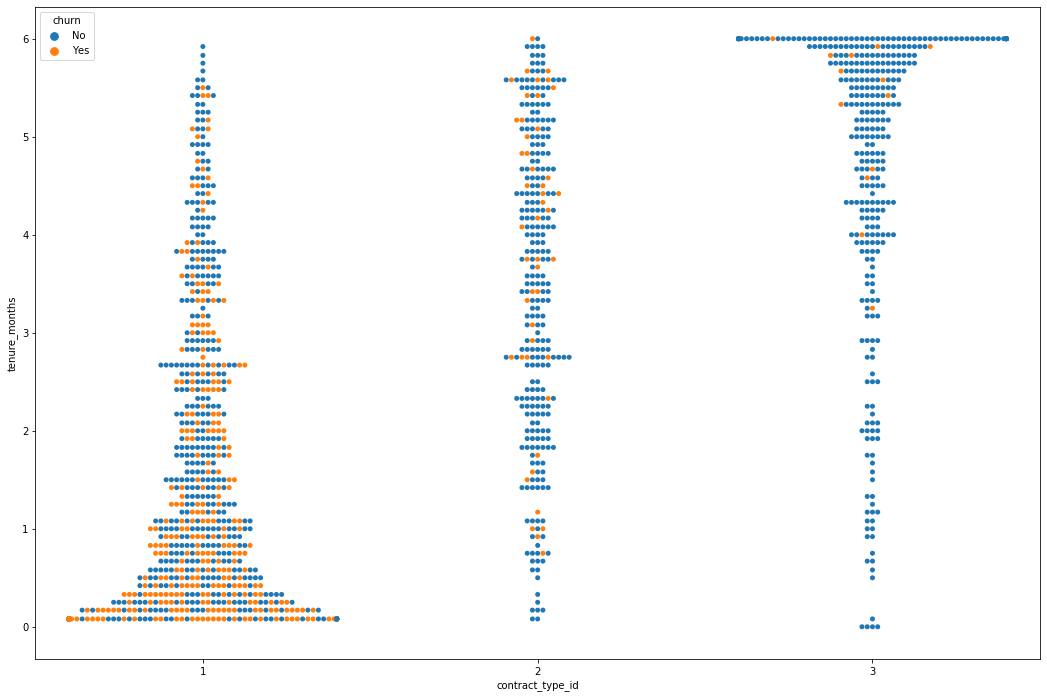

In [17]:
plt.figure(figsize=(18, 12))
sns.swarmplot(x='contract_type_id', y="tenure_months", data=train, hue='churn');
plt.show()

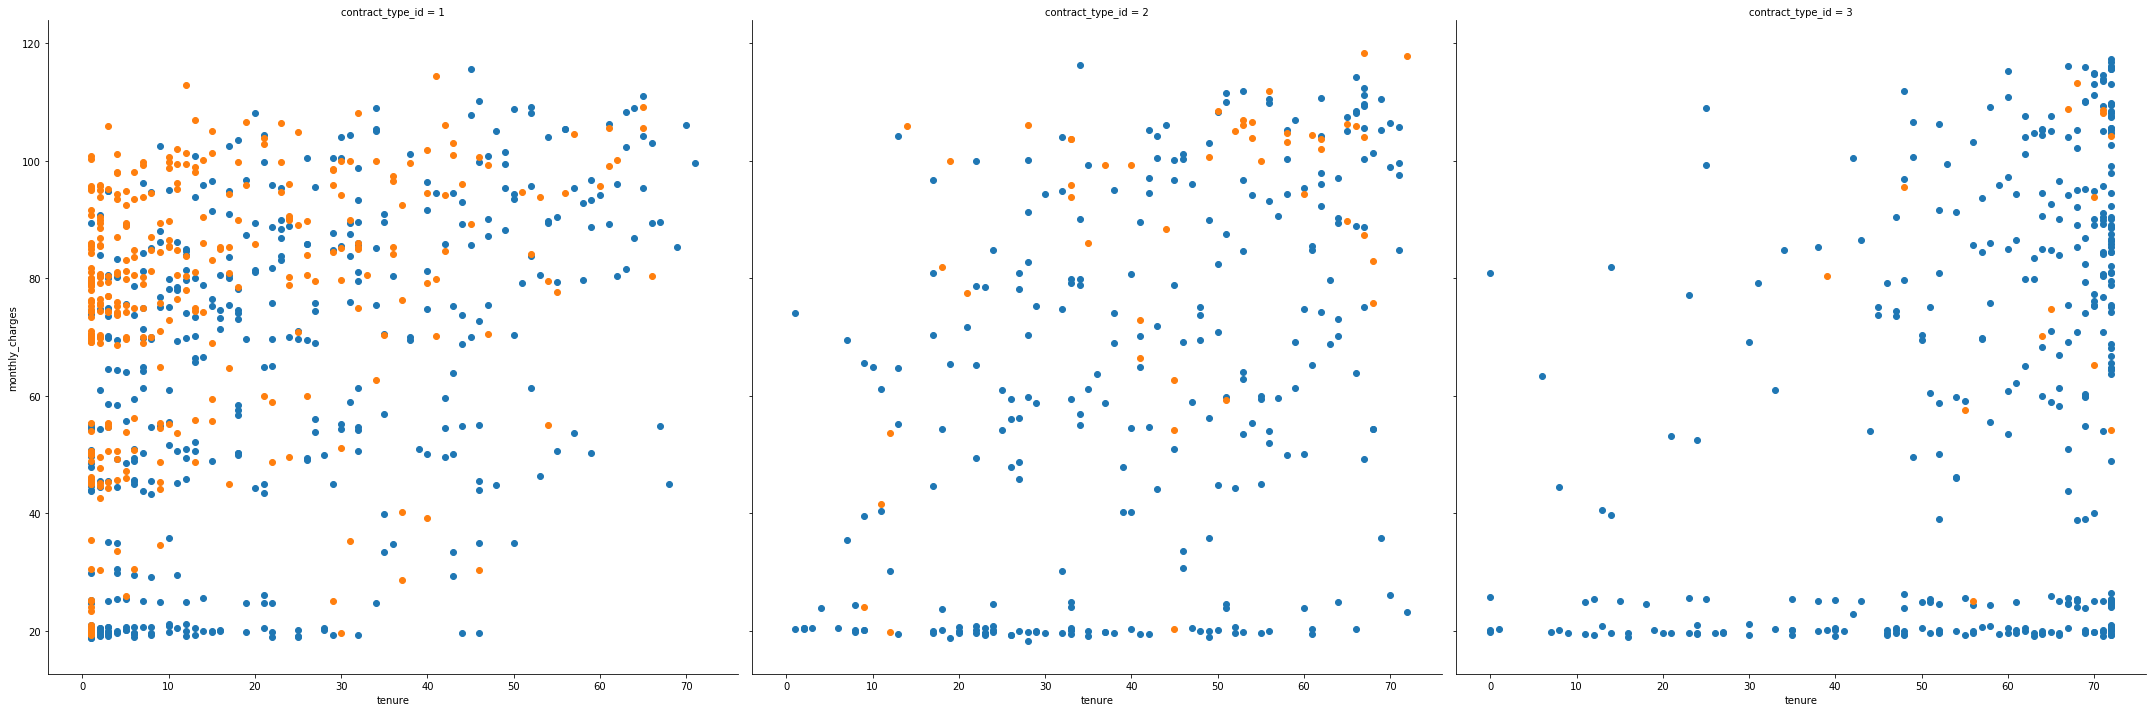

In [18]:
g = sns.FacetGrid(train, col="contract_type_id", hue='churn', margin_titles=True, height=10)
g.map(plt.scatter, "tenure", "monthly_charges")

In [19]:
# Churn rate by contract type
month_to_month_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1)).sum() / (train.churn == 'Yes').sum()
one_year_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 2)).sum() / (train.churn == 'Yes').sum()
two_year_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 3)).sum() / (train.churn == 'Yes').sum()

print('Churn rates by contract type:')
print('- Month-to-month has a {:.2f}% turn over rate'.format(month_to_month_churn_rate * 100))
print('- One year has a {:.2f}% turn over rate'.format(one_year_churn_rate * 100))
print('- Two has a {:.2f}% turn over rate'.format(two_year_churn_rate * 100))

Churn rates by contract type:
- Month-to-month has a 84.44% turn over rate
- One year has a 11.99% turn over rate
- Two has a 3.57% turn over rate


#### Out of all the customers that have churned, month-to-month contracts have the highest rate

In [20]:
one_to_twenty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'one_to_twenty')).sum() / (train.churn == 'Yes').sum()
twenty_one_to_thirty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'twenty_one_to_thirty')).sum() / (train.churn == 'Yes').sum()
thirty_one_to_forty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'thirty_one_to_forty')).sum() / (train.churn == 'Yes').sum()
forty_one_to_fifty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'forty_one_to_fifty')).sum() / (train.churn == 'Yes').sum()
fifty_one_to_sixty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'fifty_one_to_sixty')).sum() / (train.churn == 'Yes').sum()
sixty_one_to_seventy_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'sixty_one_to_seventy')).sum() / (train.churn == 'Yes').sum()
seventy_one_to_eighty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'seventy_one_to_eighty')).sum() / (train.churn == 'Yes').sum()
eighty_one_to_ninety_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'eighty_one_to_ninety')).sum() / (train.churn == 'Yes').sum()
ninety_one_to_one_hundred_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'ninety_one_to_one_hundred')).sum() / (train.churn == 'Yes').sum()
one_hundred_one_to_one_hundred_ten_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'one_hundred_to_one_hundred_ten')).sum() / (train.churn == 'Yes').sum()
one_hundred_eleven_to_hundred_twenty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'one_hundred_eleven_to_hundred_twenty')).sum() / (train.churn == 'Yes').sum()
more_then_one_hundred_twenty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'more_then_one_hundred_twenty')).sum() / (train.churn == 'Yes').sum()
zero_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'zero')).sum() / (train.churn == 'Yes').sum()

In [21]:
m2m_churn_of_all_churn = \
one_to_twenty_churn_rate + \
twenty_one_to_thirty_churn_rate + \
thirty_one_to_forty_churn_rate + \
forty_one_to_fifty_churn_rate + \
fifty_one_to_sixty_churn_rate + \
sixty_one_to_seventy_churn_rate + \
seventy_one_to_eighty_churn_rate + \
eighty_one_to_ninety_churn_rate + \
ninety_one_to_one_hundred_churn_rate + \
one_hundred_one_to_one_hundred_ten_churn_rate + \
one_hundred_eleven_to_hundred_twenty_churn_rate + \
more_then_one_hundred_twenty_churn_rate + \
zero_churn_rate

In [22]:
print('Churn rates by Month-to-month  and monthly groups:')
print('- {:.2f}%: Month-to-month and one_to_twenty_churn_rate'.format(one_to_twenty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and twenty_one_to_thirty_churn_rate'.format(twenty_one_to_thirty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and thirty_one_to_forty_churn_rate'.format(thirty_one_to_forty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and forty_one_to_fifty_churn_rate'.format(forty_one_to_fifty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and fifty_one_to_sixty_churn_rate'.format(fifty_one_to_sixty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and sixty_one_to_seventy_churn_rate'.format(sixty_one_to_seventy_churn_rate * 100))
print('- {:.2f}%: Month-to-month and seventy_one_to_eighty_churn_rate'.format(seventy_one_to_eighty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and eighty_one_to_ninety_churn_rate'.format(eighty_one_to_ninety_churn_rate * 100))
print('- {:.2f}%: Month-to-month and ninety_one_to_one_hundred_churn_rate'.format(ninety_one_to_one_hundred_churn_rate * 100))
print('- {:.2f}%: Month-to-month and one_hundred_one_to_one_hundred_ten_churn_rate'.format(one_hundred_one_to_one_hundred_ten_churn_rate * 100))
print('- {:.3f}%: Month-to-month and one_hundred_eleven_to_hundred_twenty_churn_rate'.format(one_hundred_eleven_to_hundred_twenty_churn_rate * 100))
print('- {:.5f}%: Month-to-month and more_then_one_hundred_twenty_churn_rate'.format(more_then_one_hundred_twenty_churn_rate * 100))
print('- {:.5f}%: Month-to-month and zero churn rate'.format(zero_churn_rate * 100))

Churn rates by Month-to-month  and monthly groups:
- 2.55%: Month-to-month and one_to_twenty_churn_rate
- 3.83%: Month-to-month and twenty_one_to_thirty_churn_rate
- 2.30%: Month-to-month and thirty_one_to_forty_churn_rate
- 6.89%: Month-to-month and forty_one_to_fifty_churn_rate
- 5.87%: Month-to-month and fifty_one_to_sixty_churn_rate
- 5.10%: Month-to-month and sixty_one_to_seventy_churn_rate
- 17.35%: Month-to-month and seventy_one_to_eighty_churn_rate
- 17.86%: Month-to-month and eighty_one_to_ninety_churn_rate
- 14.80%: Month-to-month and ninety_one_to_one_hundred_churn_rate
- 7.40%: Month-to-month and one_hundred_one_to_one_hundred_ten_churn_rate
- 0.510%: Month-to-month and one_hundred_eleven_to_hundred_twenty_churn_rate
- 0.00000%: Month-to-month and more_then_one_hundred_twenty_churn_rate
- 0.00000%: Month-to-month and zero churn rate


#### - churn, month-to-month, and monthly_charges_group to telco population

In [23]:
overall_one_to_twenty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'one_to_twenty')).sum() / train.shape[0]
overall_twenty_one_to_thirty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'twenty_one_to_thirty')).sum() / train.shape[0]
overall_thirty_one_to_forty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'thirty_one_to_forty')).sum() / train.shape[0]
overall_forty_one_to_fifty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'forty_one_to_fifty')).sum() / train.shape[0]
overall_fifty_one_to_sixty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'fifty_one_to_sixty')).sum() / train.shape[0]
overall_sixty_one_to_seventy_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'sixty_one_to_seventy')).sum() / train.shape[0]
overall_seventy_one_to_eighty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'seventy_one_to_eighty')).sum() / train.shape[0]
overall_eighty_one_to_ninety_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'eighty_one_to_ninety')).sum() / train.shape[0]
overall_ninety_one_to_one_hundred_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'ninety_one_to_one_hundred')).sum() / train.shape[0]
overall_one_hundred_one_to_one_hundred_ten_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'one_hundred_to_one_hundred_ten')).sum() / train.shape[0]
overall_one_hundred_eleven_to_hundred_twenty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'one_hundred_eleven_to_hundred_twenty')).sum() / train.shape[0]
overall_more_then_one_hundred_twenty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'more_then_one_hundred_twenty')).sum() / train.shape[0]
overall_zero_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'zero')).sum() / train.shape[0]

In [24]:
overall_churn_rate = \
overall_one_to_twenty_churn_rate + \
overall_twenty_one_to_thirty_churn_rate + \
overall_thirty_one_to_forty_churn_rate + \
overall_forty_one_to_fifty_churn_rate + \
overall_fifty_one_to_sixty_churn_rate + \
overall_sixty_one_to_seventy_churn_rate + \
overall_seventy_one_to_eighty_churn_rate + \
overall_eighty_one_to_ninety_churn_rate + \
overall_ninety_one_to_one_hundred_churn_rate + \
overall_one_hundred_one_to_one_hundred_ten_churn_rate + \
overall_one_hundred_eleven_to_hundred_twenty_churn_rate + \
overall_more_then_one_hundred_twenty_churn_rate + \
overall_zero_churn_rate

In [25]:
print('Churn rates by Month-to-month  and monthly groups:')
print('- {:.2f}%: Month-to-month and overall_one_to_twenty_churn_rate'.format(overall_one_to_twenty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_twenty_one_to_thirty_churn_rate'.format(overall_twenty_one_to_thirty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_thirty_one_to_forty_churn_rate'.format(overall_thirty_one_to_forty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_forty_one_to_fifty_churn_rate'.format(overall_forty_one_to_fifty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_fifty_one_to_sixty_churn_rate'.format(overall_fifty_one_to_sixty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_sixty_one_to_seventy_churn_rate'.format(overall_sixty_one_to_seventy_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_seventy_one_to_eighty_churn_rate'.format(overall_seventy_one_to_eighty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_eighty_one_to_ninety_churn_rate'.format(overall_eighty_one_to_ninety_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_ninety_one_to_one_hundred_churn_rate'.format(overall_ninety_one_to_one_hundred_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_one_hundred_one_to_one_hundred_ten_churn_rate'.format(overall_one_hundred_one_to_one_hundred_ten_churn_rate * 100))
print('- {:.5f}%: Month-to-month and overall_one_hundred_eleven_to_hundred_twenty_churn_rate'.format(overall_one_hundred_eleven_to_hundred_twenty_churn_rate * 100))
print('- {:.5f}%: Month-to-month and overall_more_then_one_hundred_twenty_churn_rate'.format(overall_more_then_one_hundred_twenty_churn_rate * 100))
print('- {:.5f}%: Month-to-month and overall_zero churn rate'.format(overall_zero_churn_rate * 100))

Churn rates by Month-to-month  and monthly groups:
- 0.71%: Month-to-month and overall_one_to_twenty_churn_rate
- 1.06%: Month-to-month and overall_twenty_one_to_thirty_churn_rate
- 0.64%: Month-to-month and overall_thirty_one_to_forty_churn_rate
- 1.92%: Month-to-month and overall_forty_one_to_fifty_churn_rate
- 1.63%: Month-to-month and overall_fifty_one_to_sixty_churn_rate
- 1.42%: Month-to-month and overall_sixty_one_to_seventy_churn_rate
- 4.83%: Month-to-month and overall_seventy_one_to_eighty_churn_rate
- 4.97%: Month-to-month and overall_eighty_one_to_ninety_churn_rate
- 4.12%: Month-to-month and overall_ninety_one_to_one_hundred_churn_rate
- 2.06%: Month-to-month and overall_one_hundred_one_to_one_hundred_ten_churn_rate
- 0.14194%: Month-to-month and overall_one_hundred_eleven_to_hundred_twenty_churn_rate
- 0.00000%: Month-to-month and overall_more_then_one_hundred_twenty_churn_rate
- 0.00000%: Month-to-month and overall_zero churn rate


In [26]:
telco_churn_rate = (train.churn == "Yes").sum() / train.shape[0]
print('Telco\'s overall churn rate: {:.2f}%'.format(telco_churn_rate * 100))

Telco's overall churn rate: 27.82%


In [27]:
print('Month-to-month churn rate of all churns: {:.2f}%'.format(m2m_churn_of_all_churn * 100))

Month-to-month churn rate of all churns: 84.44%


- month_to_month has a huge impact on churn rate compared to the other contract types
- majority monthly charge impact on churn rate for month_to_month lies between 70 and 100 dollars

Tenure Group

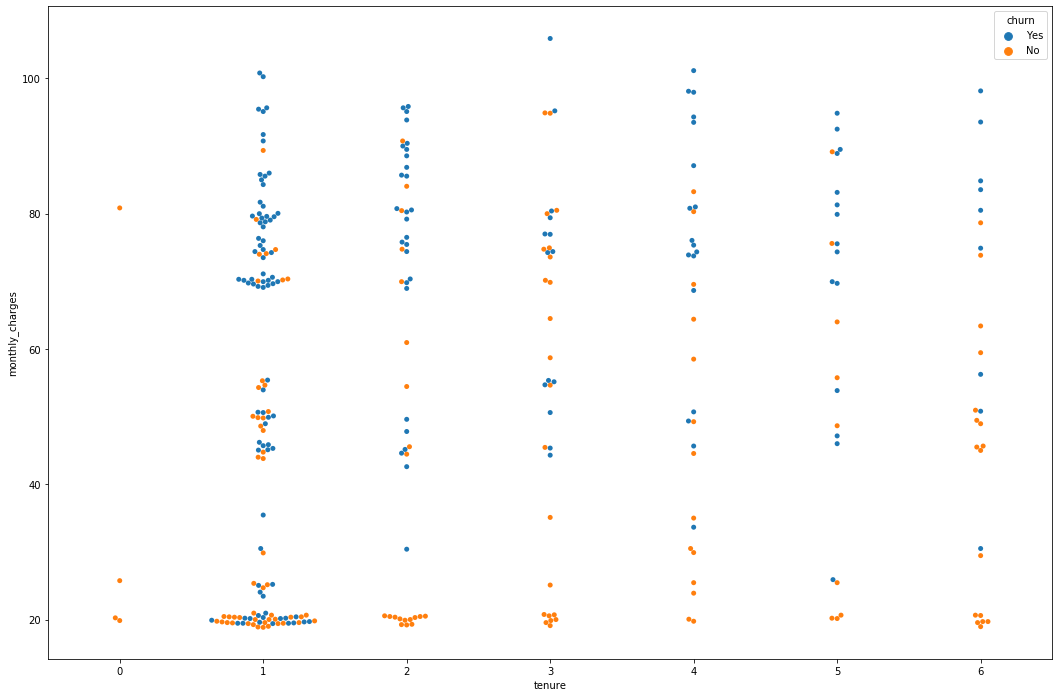

In [28]:
plt.figure(figsize=(18,12))
sns.swarmplot(x='tenure', y='monthly_charges', data=train[train.tenure_group == 'half_a_year'], hue='churn')

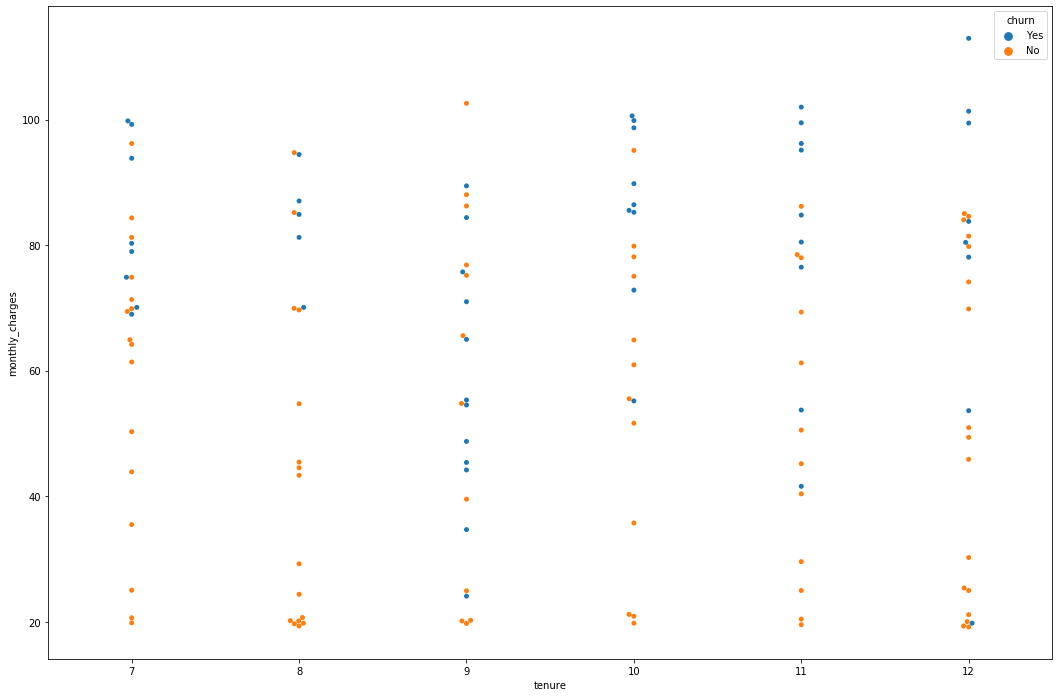

In [29]:
plt.figure(figsize=(18,12))
sns.swarmplot(x='tenure', y='monthly_charges', data=train[train.tenure_group == 'one_year'], hue='churn')

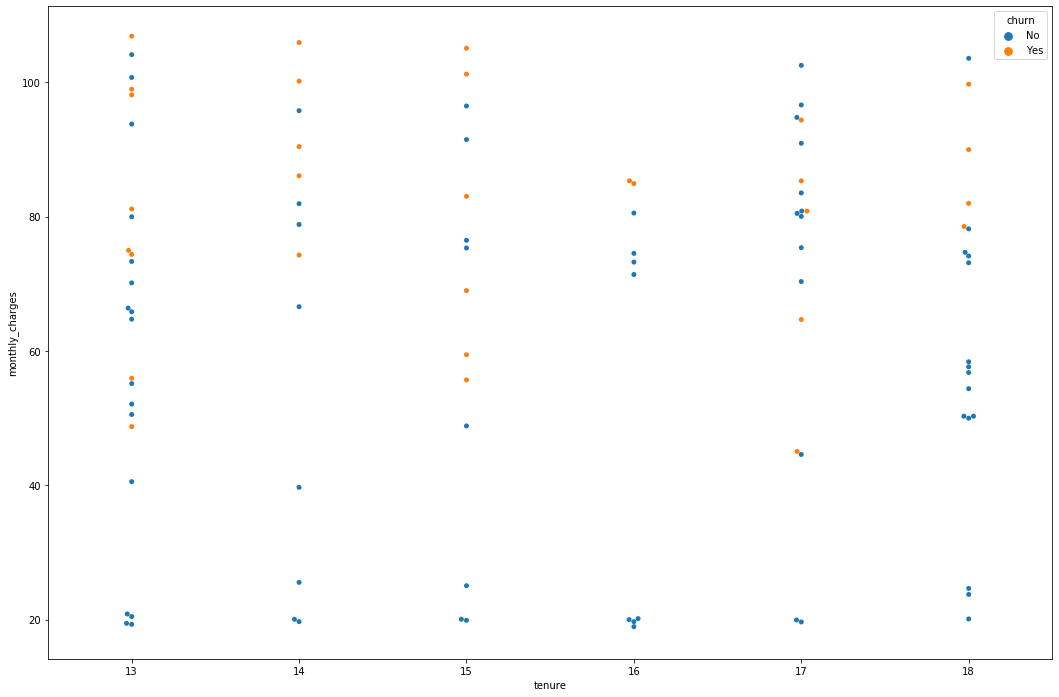

In [32]:
plt.figure(figsize=(18,12))
sns.swarmplot(x='tenure', y='monthly_charges', data=train[train.tenure_group == 'one_&_a_half_years'], hue='churn')

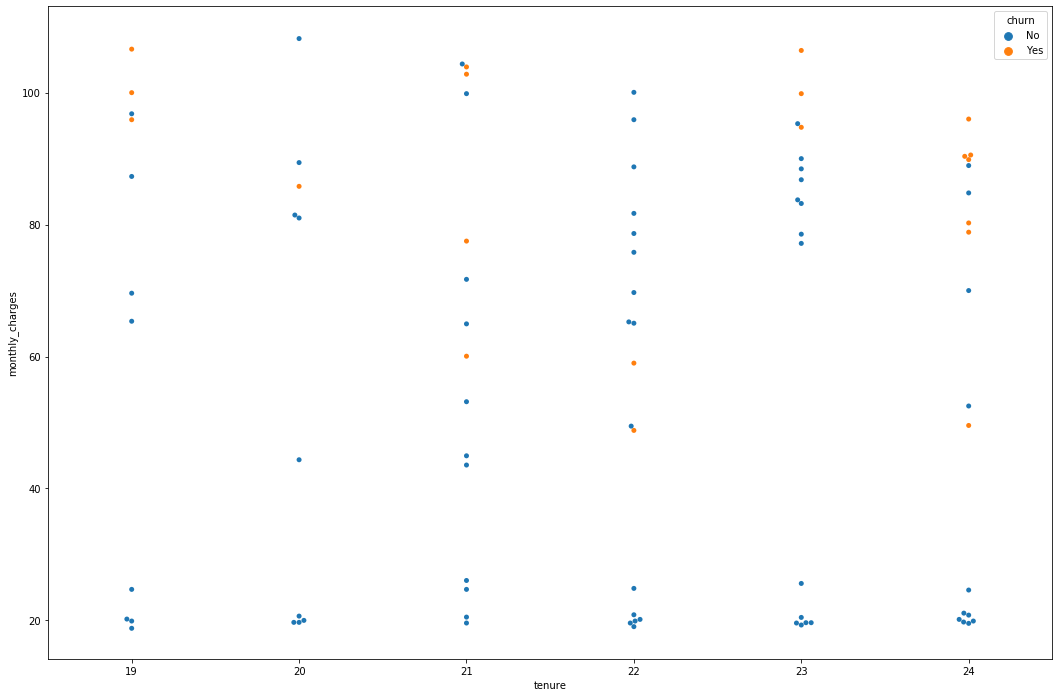

In [33]:
plt.figure(figsize=(18,12))
sns.swarmplot(x='tenure', y='monthly_charges', data=train[train.tenure_group == 'two_years'], hue='churn')

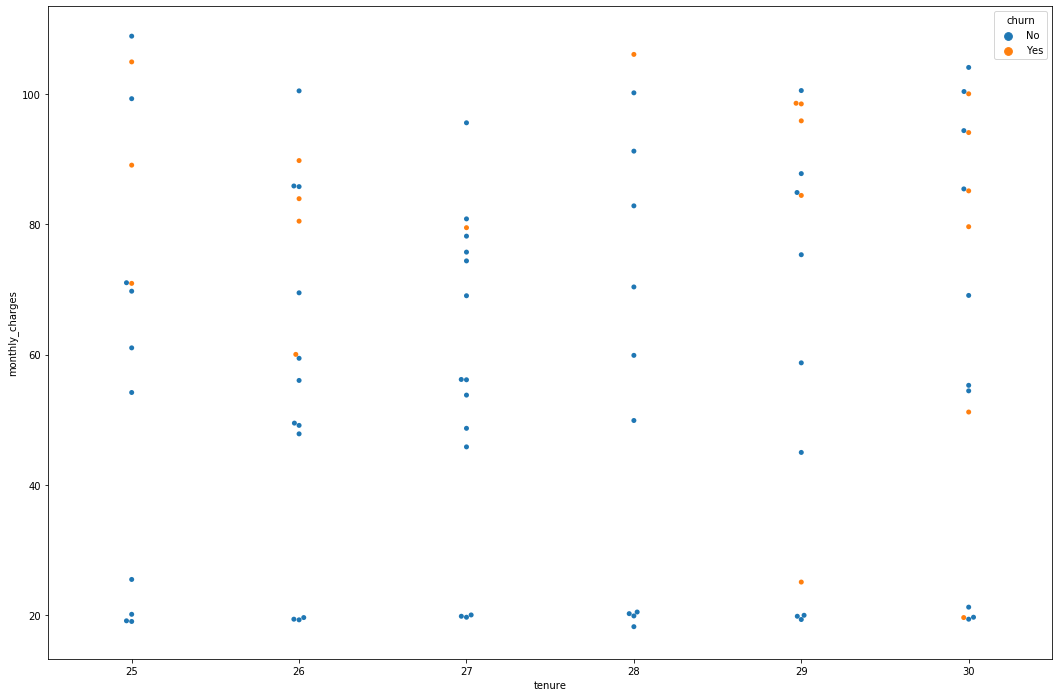

In [34]:
plt.figure(figsize=(18,12))
sns.swarmplot(x='tenure', y='monthly_charges', data=train[train.tenure_group == 'two_&_a_half_years'], hue='churn')

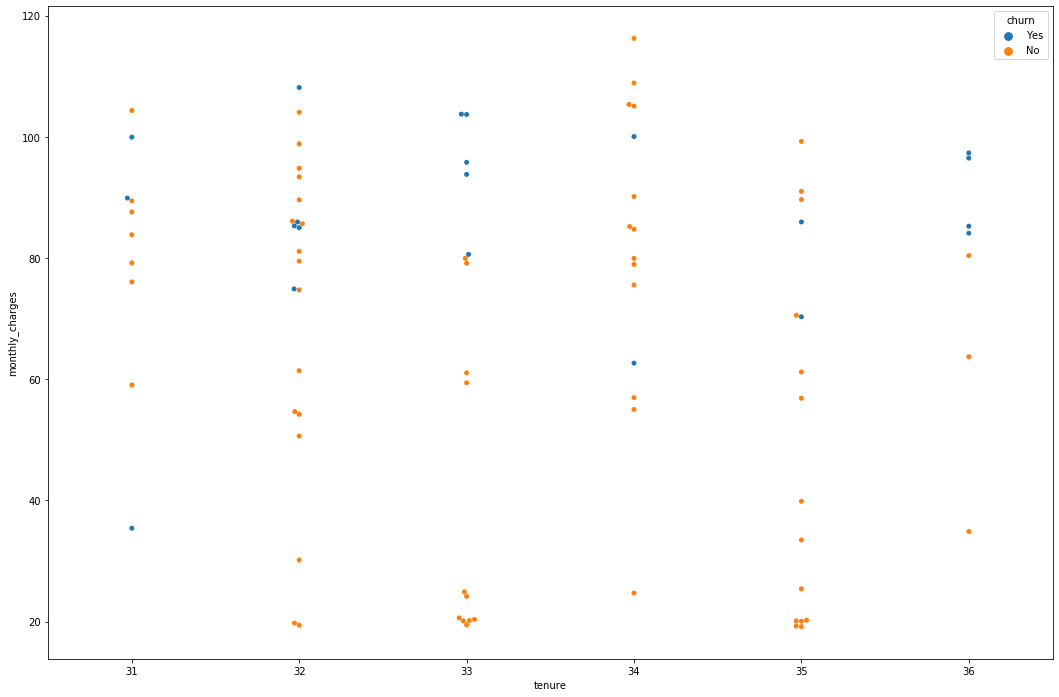

In [35]:
plt.figure(figsize=(18,12))
sns.swarmplot(x='tenure', y='monthly_charges', data=train[train.tenure_group == 'three_years'], hue='churn')

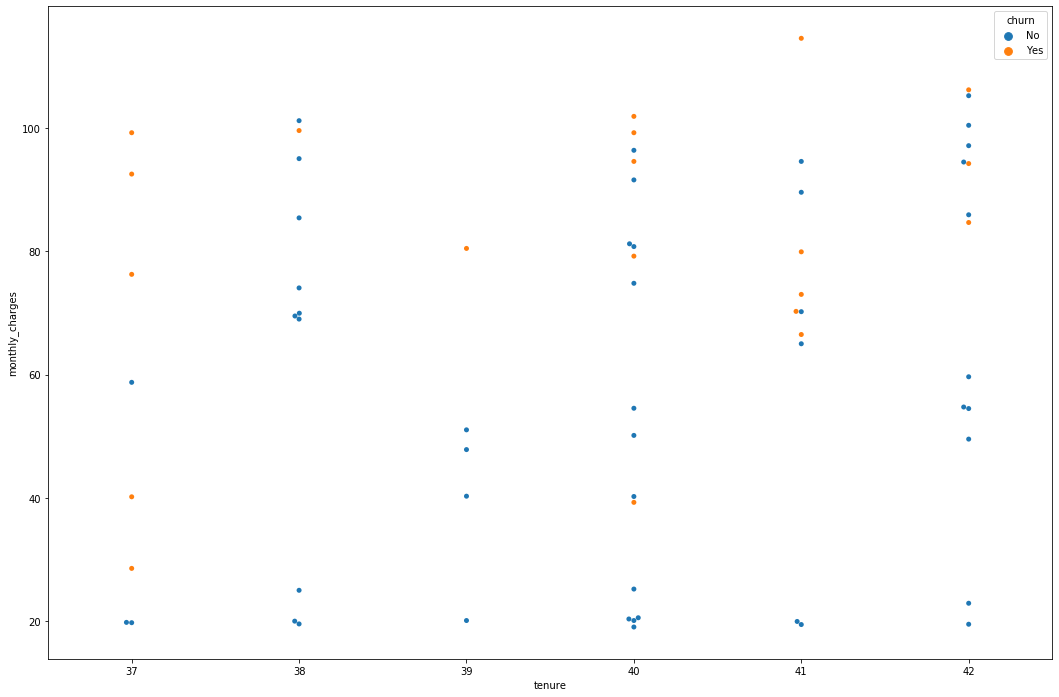

In [36]:
plt.figure(figsize=(18,12))
sns.swarmplot(x='tenure', y='monthly_charges', data=train[train.tenure_group == 'three_&_a_half_years'], hue='churn')

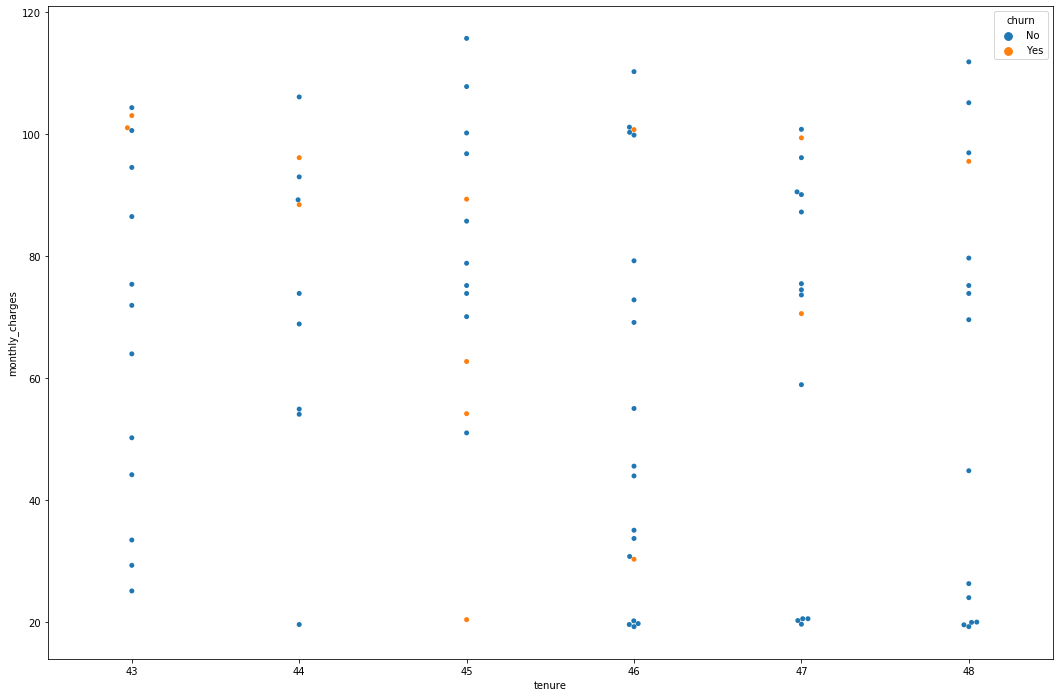

In [37]:
plt.figure(figsize=(18,12))
sns.swarmplot(x='tenure', y='monthly_charges', data=train[train.tenure_group == 'four_years'], hue='churn')

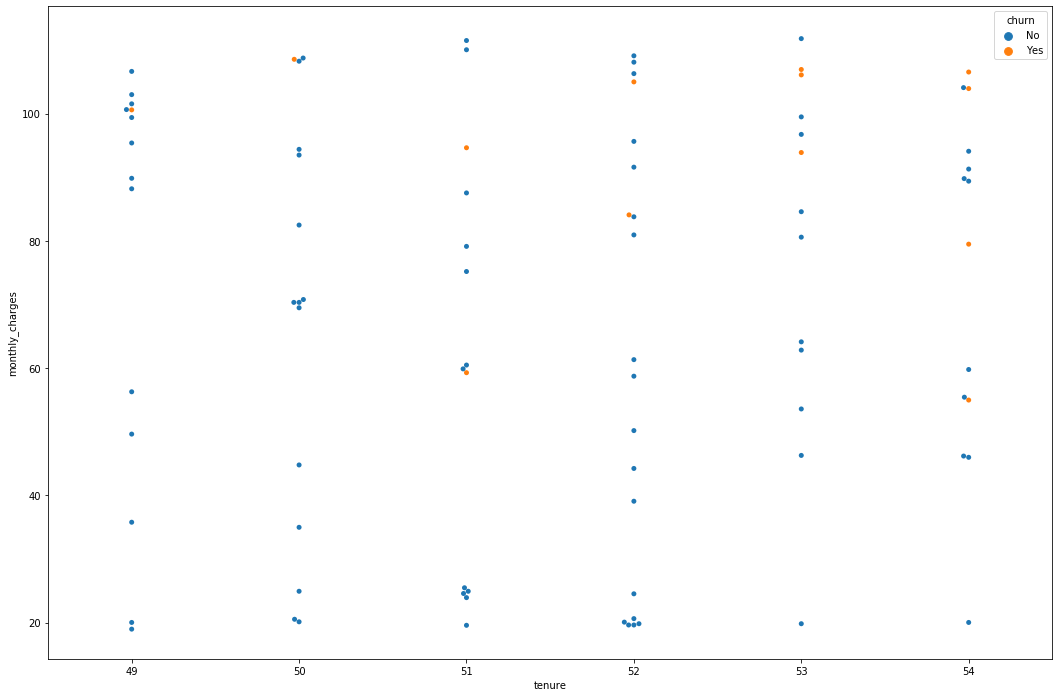

In [38]:
plt.figure(figsize=(18,12))
sns.swarmplot(x='tenure', y='monthly_charges', data=train[train.tenure_group == 'four_&_a_half_years'], hue='churn')

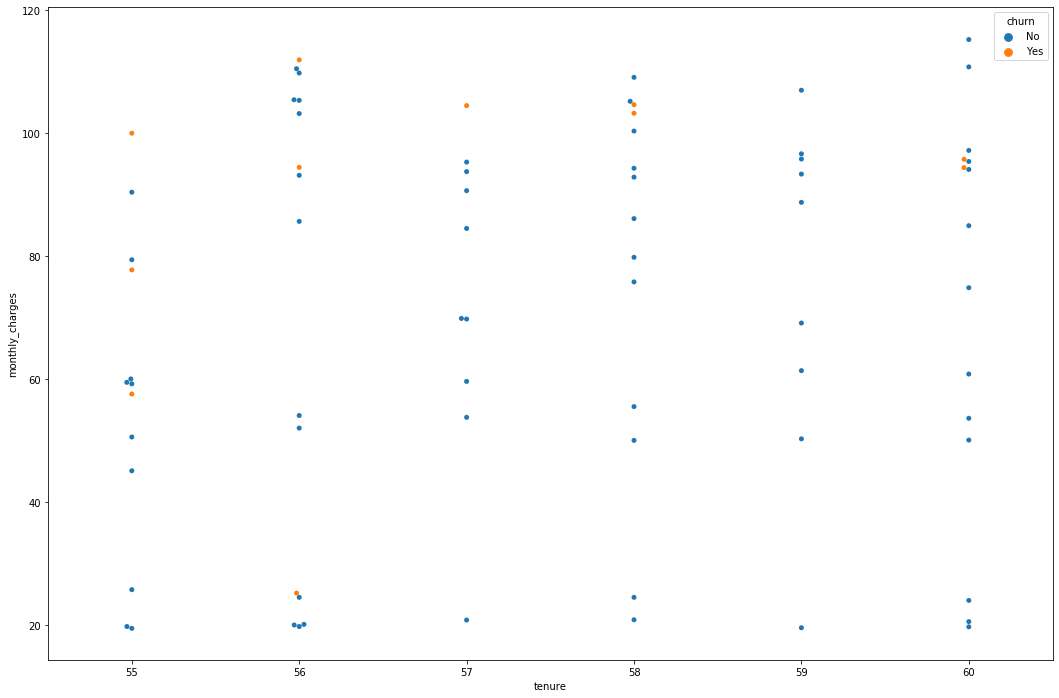

In [39]:
plt.figure(figsize=(18,12))
sns.swarmplot(x='tenure', y='monthly_charges', data=train[train.tenure_group == 'five_years'], hue='churn')

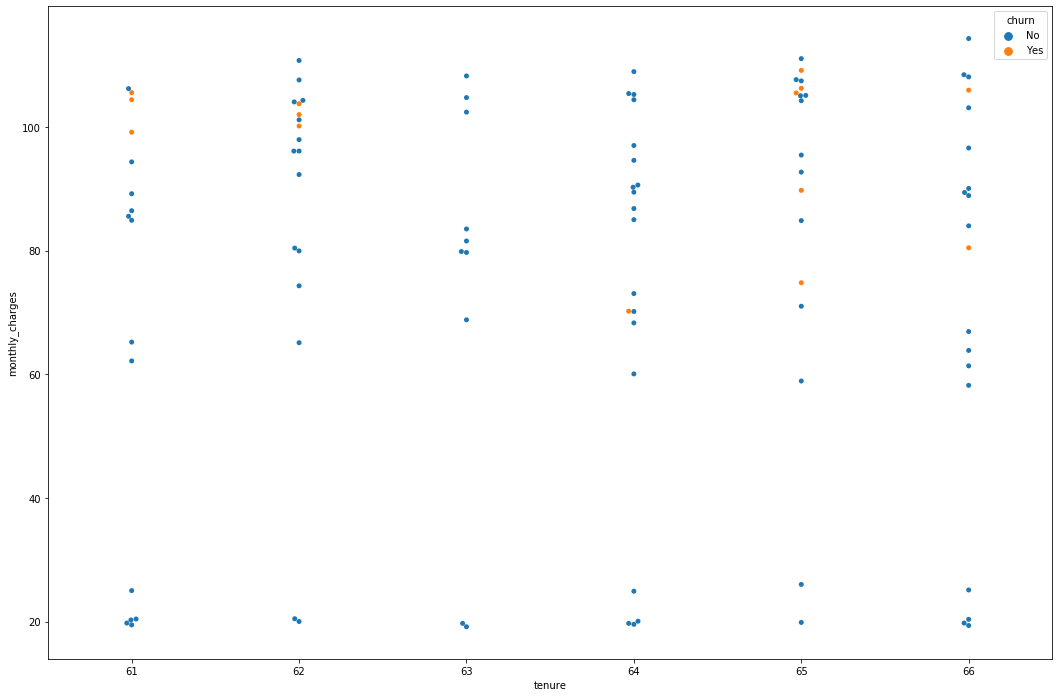

In [40]:
plt.figure(figsize=(18,12))
sns.swarmplot(x='tenure', y='monthly_charges', data=train[train.tenure_group == 'five_&_a_half_years'], hue='churn')

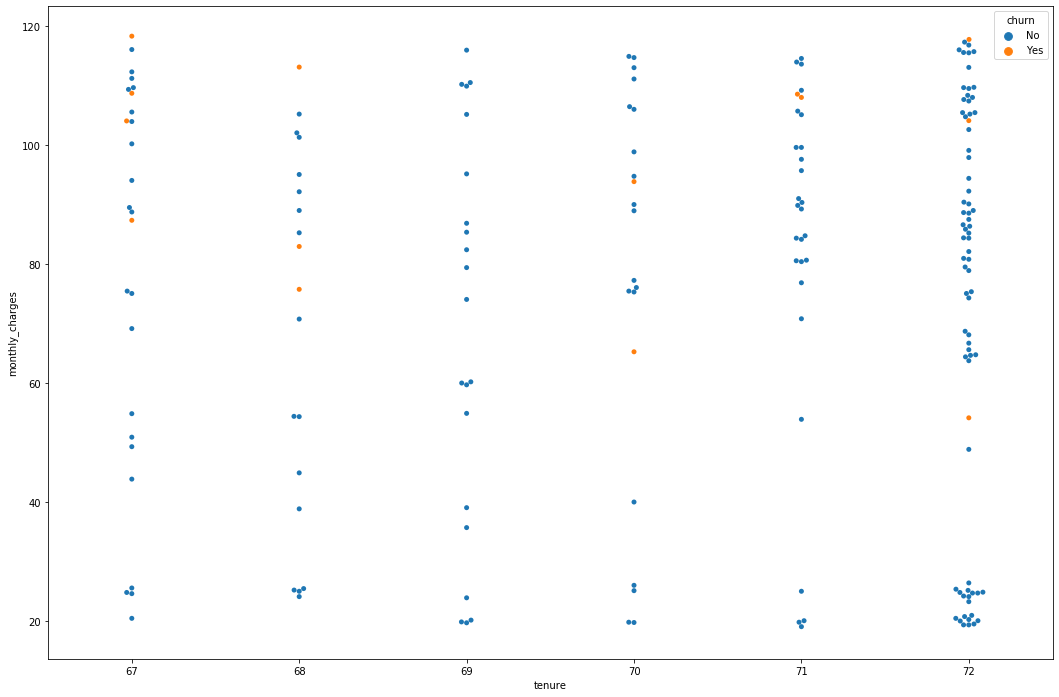

In [41]:
plt.figure(figsize=(18,12))
sns.swarmplot(x='tenure', y='monthly_charges', data=train[train.tenure_group == 'six_or_more_years'], hue='churn')

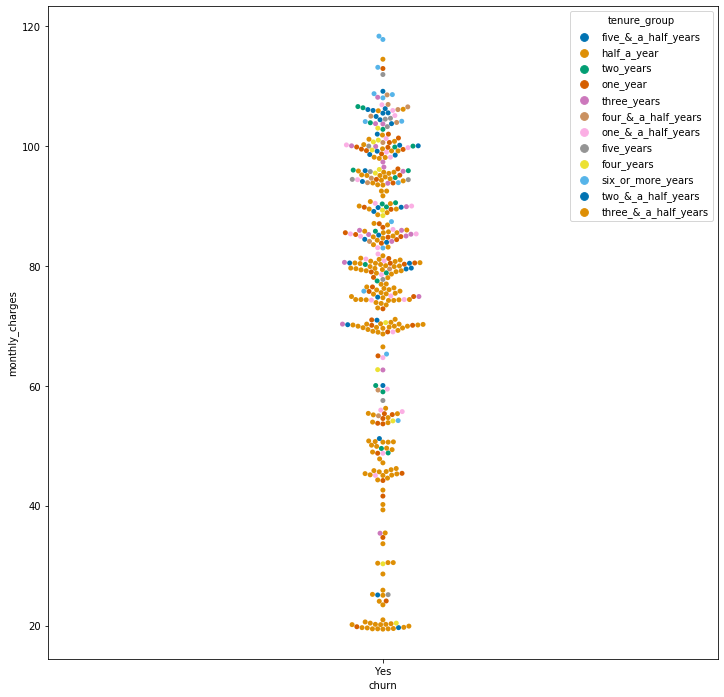

In [57]:
plt.figure(figsize=(12,12))
sns.swarmplot(x='churn', y='monthly_charges', data=train[train.churn == 'Yes'], hue='tenure_group', palette='colorblind')

In [59]:
train

,Unnamed: 0,customer_id,churn,tenure,tenure_months,tenure_nml,monthly_charges,monthly_charges_nml,total_charges,total_charges_nml,...,streaming_tv_enc,streaming_movies_enc,paperless_billing_enc,pay_elec_check,pay_mail,pay_bank,pay_cc,pay_auto,monthly_charges_group,tenure_group
0,5691,5762-TJXGK,No,52,4.33,0.559592,58.75,-0.270565,3038.55,0.485586,...,1,1,1,0,0,1,0,1,fifty_one_to_sixty,four_&_a_half_years
1,6232,6242-FEGFD,No,66,5.50,1.073988,96.60,0.971152,6424.25,1.453931,...,0,0,0,0,1,0,0,0,ninety_one_to_one_hundred,five_&_a_half_years
2,5807,7359-SSBJK,Yes,64,5.33,0.967422,70.20,-0.036837,4481.00,0.819781,...,1,0,1,0,0,0,1,1,seventy_one_to_eighty,five_&_a_half_years
3,2746,7024-OHCCK,Yes,2,0.17,-1.220640,93.85,0.787436,170.85,-1.011789,...,1,1,1,1,0,0,0,0,ninety_one_to_one_hundred,half_a_year
4,3143,9054-FOWNV,No,22,1.83,-0.216904,88.75,0.601211,1885.15,0.191240,...,1,0,1,1,0,0,0,0,eighty_one_to_ninety,two_years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,4056,3229-USWAR,No,34,2.83,0.114185,79.95,0.270877,2727.30,0.403571,...,1,1,1,0,0,1,0,1,seventy_one_to_eighty,three_years
1405,1026,8260-NGFNY,Yes,1,0.08,-1.639976,25.20,-0.790280,25.20,-1.827977,...,0,0,0,0,1,0,0,0,twenty_one_to_thirty,half_a_year
1406,2386,5334-JLAXU,No,60,5.00,0.799083,94.10,0.799083,5475.90,1.070816,...,0,1,1,0,0,0,1,1,ninety_one_to_one_hundred,five_years
1407,1776,2674-MIAHT,No,4,0.33,-0.967422,80.30,0.289947,324.20,-0.775553,...,0,0,1,0,1,0,0,0,eighty_one_to_ninety,half_a_year


In [90]:
df_tenure_groups = train.copy()
list = df_tenure_groups.columns.to_list()
list = list[:-1]
df_tenure_groups.drop(columns=(list), inplace=True)

In [91]:
df_tenure_groups

,tenure_group
0,four_&_a_half_years
1,five_&_a_half_years
2,five_&_a_half_years
3,half_a_year
4,two_years
...,...
1404,three_years
1405,half_a_year
1406,five_years
1407,half_a_year


In [81]:
(train[(train.tenure_group == 'half_a_year') | (train.tenure_group == 'one_year') | (train.tenure_group == 'one_&_half_a_year')])

,Unnamed: 0,customer_id,churn,tenure,tenure_months,tenure_nml,monthly_charges,monthly_charges_nml,total_charges,total_charges_nml,...,streaming_tv_enc,streaming_movies_enc,paperless_billing_enc,pay_elec_check,pay_mail,pay_bank,pay_cc,pay_auto,monthly_charges_group,tenure_group
3,2746,7024-OHCCK,Yes,2,0.17,-1.220640,93.85,0.787436,170.85,-1.011789,...,1,1,1,1,0,0,0,0,ninety_one_to_one_hundred,half_a_year
8,5189,5808-TOTXO,No,3,0.25,-1.073988,20.55,-1.015717,57.40,-1.518241,...,0,0,1,0,0,0,1,1,twenty_one_to_thirty,half_a_year
10,2612,6372-RFVNS,Yes,1,0.08,-1.639976,78.80,0.210694,78.80,-1.317350,...,1,0,0,1,0,0,0,0,seventy_one_to_eighty,half_a_year
18,3612,4760-XOHVN,Yes,1,0.08,-1.639976,19.45,-1.876359,19.45,-2.379928,...,0,0,0,0,1,0,0,0,one_to_twenty,half_a_year
19,3372,0463-WZZKO,No,3,0.25,-1.073988,20.75,-0.973660,67.10,-1.475294,...,0,0,1,0,0,0,1,1,twenty_one_to_thirty,half_a_year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,1918,3217-FZDMN,Yes,8,0.67,-0.714776,94.45,0.827924,742.95,-0.387941,...,1,1,1,0,0,0,1,1,ninety_one_to_one_hundred,one_year
1401,759,6158-HDPXZ,No,1,0.08,-1.639976,25.35,-0.777190,25.35,-1.826383,...,0,0,0,0,1,0,0,0,twenty_one_to_thirty,half_a_year
1403,6413,0224-NIJLP,No,8,0.67,-0.714776,20.15,-1.168949,165.50,-1.026379,...,0,0,0,0,1,0,0,0,twenty_one_to_thirty,one_year
1405,1026,8260-NGFNY,Yes,1,0.08,-1.639976,25.20,-0.790280,25.20,-1.827977,...,0,0,0,0,1,0,0,0,twenty_one_to_thirty,half_a_year


In [ ]:
g = sns.FacetGrid(df, col="extra_lines", hue='churn', margin_titles=True, height=10)
g.map(plt.scatter, "tenure", "monthly_charges")